In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Indian_liver_patient'
df = pd.read_csv(file_path)
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# Convert target column: 1 = Liver disease, 2 = No disease → 1 and 0
df['Dataset'] = df['Dataset'].map({1: 1, 2: 0})

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Fill missing values (Albumin and Globulin Ratio has NaNs)
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

# Convert categorical column (Gender) to numeric
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Separate features and target
X = df.drop('Dataset', axis=1)
y = df['Dataset']


Missing values:
 Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


/tmp/ipython-input-4-1219944304.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)


In [ ]:
# Fill missing values in 'Albumin_and_Globulin_Ratio' with mean (safe way)
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())


In [ ]:
# Separate features (X) and target (y)
X = df.drop('Dataset', axis=1)
y = df['Dataset']


In [ ]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7435897435897436
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.40      0.44        30
           1       0.81      0.86      0.83        87

    accuracy                           0.74       117
   macro avg       0.65      0.63      0.64       117
weighted avg       0.73      0.74      0.73       117

Confusion Matrix:
 [[12 18]
 [12 75]]


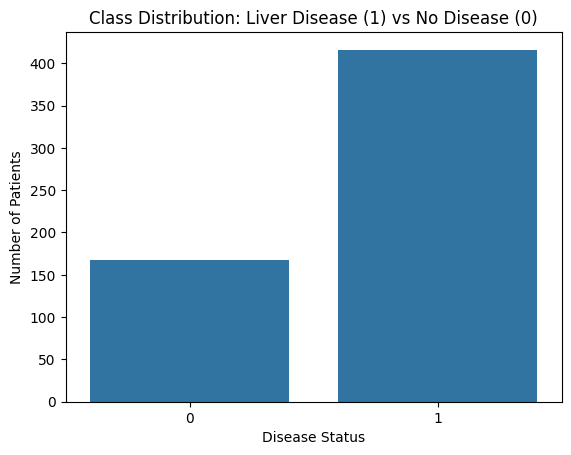

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Dataset')
plt.title("Class Distribution: Liver Disease (1) vs No Disease (0)")
plt.xlabel("Disease Status")
plt.ylabel("Number of Patients")
plt.show()


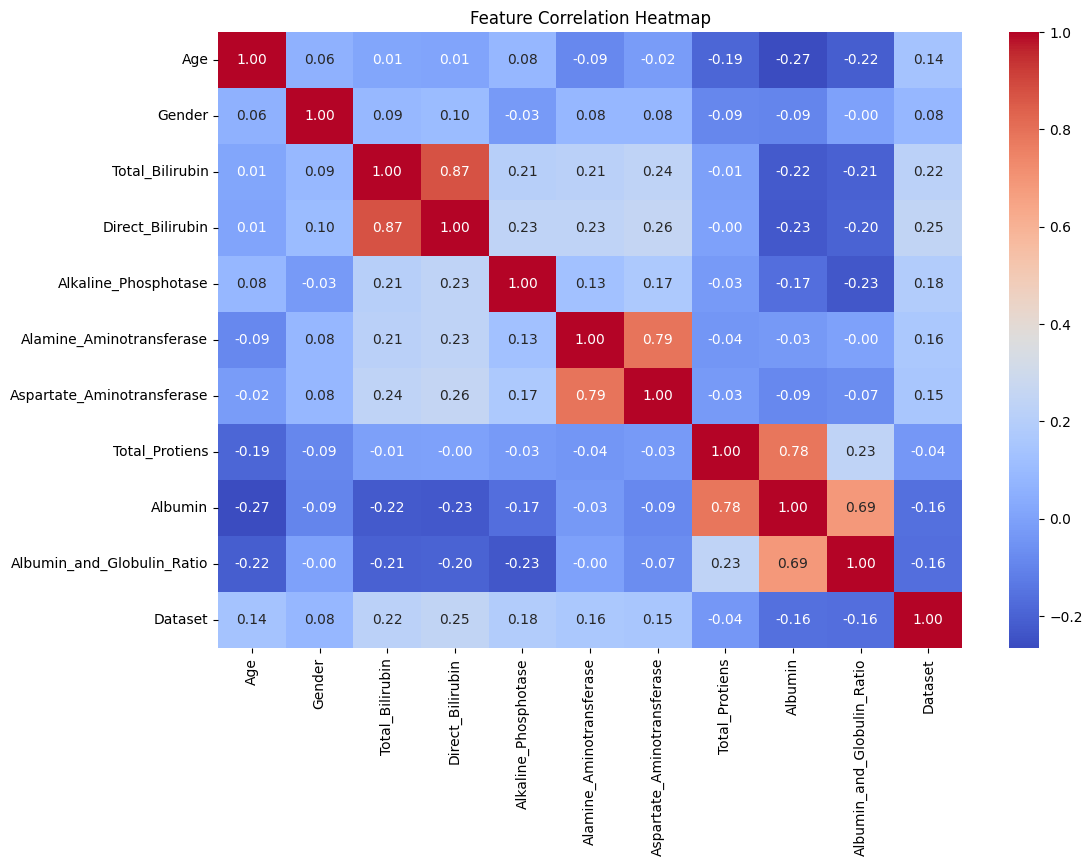

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


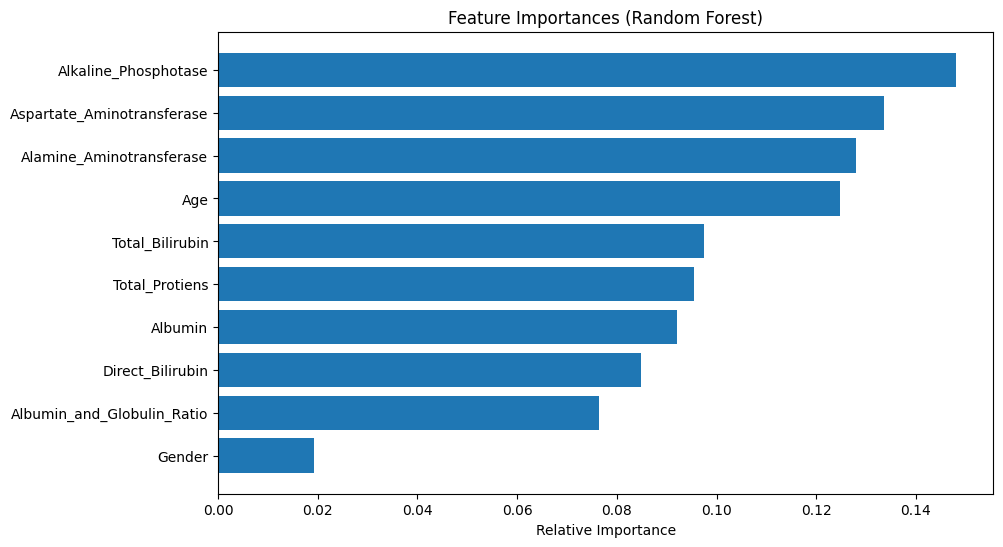

In [ ]:
import numpy as np

# Get feature importances
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
!pip install shap


In [ ]:
import shap

# Initialize the JS visualization
shap.initjs()

# Create TreeExplainer for Random Forest
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


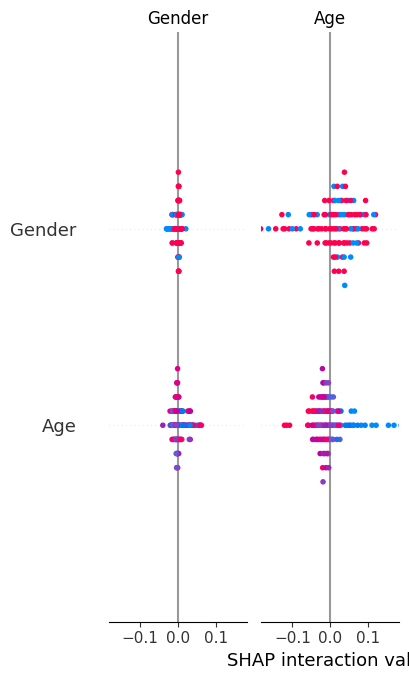

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
# Force plot for 1st test sample
shap.force_plot(explainer.expected_value[1], shap_values[0, :, 1], X_test.iloc[0, :])

In [ ]:
import shap
shap.initjs()


In [ ]:
# Save to HTML (interactive)
shap.save_html("force_plot.html", shap.force_plot(
    explainer.expected_value[1],
    shap_values[0, :, 1],
    X_test.iloc[0, :]
))


In [ ]:
# Save to HTML (interactive)
shap.save_html("force_plot.html", shap.force_plot(
    explainer.expected_value[1],
    shap_values[0, :, 1],
    X_test.iloc[0, :]
))


In [ ]:
# Save force plot as HTML
shap.save_html("force_plot.html", shap.force_plot(explainer.expected_value[1], shap_values[0, :, 1], X_test.iloc[0]))

In [ ]:
!pip install gradio gTTS langdetect deep-translator


In [ ]:
import gradio as gr
from gtts import gTTS
from langdetect import detect
from deep_translator import GoogleTranslator


In [ ]:
def translate_text(text, target_lang="en"):
    try:
        detected_lang = detect(text)
        if detected_lang != target_lang:
            return GoogleTranslator(source=detected_lang, target=target_lang).translate(text)
        return text
    except:
        return text

def predict_liver_disease(input_features):
    import numpy as np
    input_array = np.array(input_features).reshape(1, -1)
    prediction = model.predict(input_array)[0]
    return "Liver Disease" if prediction == 1 else "No Liver Disease"


In [ ]:
feature_labels = list(X.columns)

gradio_inputs = [gr.Textbox(label=label) for label in feature_labels]

gr.Interface(
    fn=lambda *args: predict_liver_disease([float(x) for x in args]),
    inputs=gradio_inputs,
    outputs="text",
    title="AI-based Liver Disease Prediction",
    description="Multilingual, voice-supported predictor using Random Forest and SHAP"
).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7ced8fb510b81b5d95.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install --upgrade gradio gtts googletrans-py
import gradio as gr
import numpy as np
import pandas as pd
import joblib
from googletrans import Translator
from gtts import gTTS
import os
from IPython.display import Audio

In [ ]:
import joblib
joblib.dump(model, "liver_model.pkl")

['liver_model.pkl']

In [ ]:
model = joblib.load("liver_model.pkl")


In [ ]:
translator = Translator()

def predict_liver_disease(age, gender, total_bilirubin, direct_bilirubin, alk_phos, sgpt, sgot, total_protein, albumin, ag_ratio, lang="en"):
    # Gender to numeric
    gender = 1 if gender.lower() == "male" else 0

    # Feature vector
    features = np.array([[age, gender, total_bilirubin, direct_bilirubin,
                          alk_phos, sgpt, sgot, total_protein, albumin, ag_ratio]])

    prediction = model.predict(features)[0]
    result = "Liver Disease Detected" if prediction == 1 else "No Liver Disease"

    # Translate if needed
    if lang != "en":
        translated = translator.translate(result, src='en', dest=lang)
        result = translated.text

    return result


In [ ]:
interface = gr.Interface(
    fn=predict_liver_disease,
    inputs=[
        gr.Number(label="Age"),
        gr.Radio(["Male", "Female"], label="Gender"),
        gr.Number(label="Total Bilirubin"),
        gr.Number(label="Direct Bilirubin"),
        gr.Number(label="Alkaline Phosphotase"),
        gr.Number(label="SGPT"),
        gr.Number(label="SGOT"),
        gr.Number(label="Total Proteins"),
        gr.Number(label="Albumin"),
        gr.Number(label="Albumin and Globulin Ratio"),
        gr.Dropdown(label="Language", choices=["en", "hi", "gu", "mr", "ta", "bn"], value="en")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Liver Disease Predictor (Multilingual)",
    description="Upload patient data and get prediction with support for multiple Indian languages."
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a0ca83a8a286124790.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install SpeechRecognition
import speech_recognition as sr
from gtts import gTTS
import tempfile

def predict_liver_with_voice(age, gender, total_bilirubin, direct_bilirubin, alk_phos, sgpt, sgot, total_protein, albumin, ag_ratio, lang="en"):
    # Gender to numeric
    gender = 1 if gender.lower() == "male" else 0

    # Feature vector
    features = np.array([[age, gender, total_bilirubin, direct_bilirubin,
                          alk_phos, sgpt, sgot, total_protein, albumin, ag_ratio]])

    prediction = model.predict(features)[0]
    result = "Liver Disease Detected" if prediction == 1 else "No Liver Disease"

    # Translate result
    if lang != "en":
        translated = translator.translate(result, src='en', dest=lang)
        result = translated.text

    # Convert to speech
    tts = gTTS(text=result, lang=lang)
    temp_audio = tempfile.NamedTemporaryFile(delete=False, suffix=".mp3")
    tts.save(temp_audio.name)

    return result, temp_audio.name

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 55.5 MB/s eta 0:00:00


In [ ]:
interface = gr.Interface(
    fn=predict_liver_with_voice,
    inputs=[
        gr.Number(label="Age"),
        gr.Radio(["Male", "Female"], label="Gender"),
        gr.Number(label="Total Bilirubin"),
        gr.Number(label="Direct Bilirubin"),
        gr.Number(label="Alkaline Phosphotase"),
        gr.Number(label="SGPT"),
        gr.Number(label="SGOT"),
        gr.Number(label="Total Proteins"),
        gr.Number(label="Albumin"),
        gr.Number(label="Albumin and Globulin Ratio"),
        gr.Dropdown(label="Language", choices=["en", "hi", "gu", "bn", "ta", "te"], value="en")
    ],
    outputs=[
        gr.Textbox(label="Prediction"),
        gr.Audio(label="Voice Output")
    ],
    title="🎙️ Liver Disease Detector (Voice + Multilingual)",
    description="Speak or type input. Get predictions in your language, with voice output!"
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a6b388e71f987b8467.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7435897435897436
[[12 18]
 [12 75]]
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        30
           1       0.81      0.86      0.83        87

    accuracy                           0.74       117
   macro avg       0.65      0.63      0.64       117
weighted avg       0.73      0.74      0.73       117

